In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
access_csv = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [ ]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.shape

(500, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape

(500, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [ ]:
X_train_scalled.shape

(400, 7)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(11, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics='accuracy')

In [ ]:
history = model.fit(X_train_scalled, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 1s 15ms/step - loss: 0.9100 - accuracy: 0.0000e+00 - val_loss: 0.8957 - val_accuracy: 0.0000e+00
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.7517 - accuracy: 0.0000e+00 - val_loss: 0.7373 - val_accuracy: 0.0000e+00
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.6177 - accuracy: 0.0000e+00 - val_loss: 0.6047 - val_accuracy: 0.0000e+00
Epoch 4/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.0000e+00 - val_loss: 0.4994 - val_accuracy: 0.0000e+00
Epoch 5/150
10/10 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.0000e+00 - val_loss: 0.3767 - val_accuracy: 0.0000e+00
Epoch 6/150
10/10 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.0000e+00 - val_loss: 0.2415 - val_accuracy: 0.0000e+00
Epoch 7/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.0000e+00 - 

In [ ]:
y_pred = model.predict(X_test_scalled)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8283522664535319

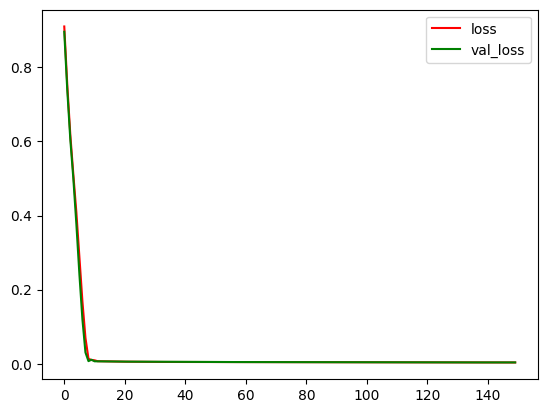

In [ ]:
plt.plot(history.history['loss'], label='loss', color='r')
plt.plot(history.history['val_loss'], label='val_loss', color='g')
plt.legend()

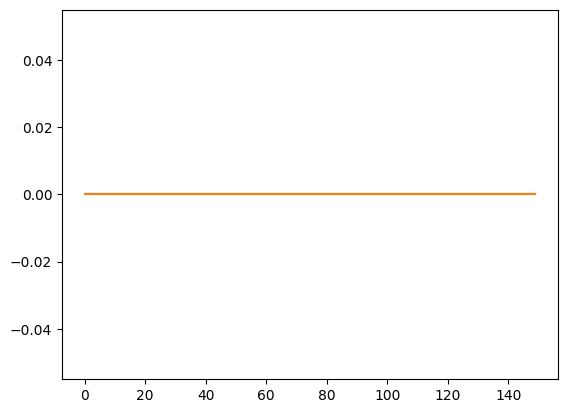

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])